In [1]:
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

## Part I

In [2]:
import numpy as np

In [3]:
# Rescale data (between 0 and 1)

#*** 1 
data = np.asarray([1,3,7])
#*** 2
def norm_scale_input(x):
    #get max and min of array
    max_x = x[np.argmax(x)]
    min_x = x[np.argmin(x)]
    # def function to scale each element
    def scale_func(x):
        return (x-min_x)/(max_x-min_x)
    np.vectorize(scale_func)
    #def func to normalize the array
    def norm_func(x):
        return x/mag
    np.vectorize(norm_func)
    #scales the original values
    scaled = scale_func(x)
    #gets magnitude from new scaled array
    mag = np.linalg.norm(scaled)
    #calc's and returns the unit vector of the scaled data
    return norm_func(scaled)
#x_norm'd and scaled
x_ns = norm_scale_input(data)


#### does bias have weights, if so are they another row of the weight matrix?
#### did I do the derivative right?
#### loss becomes nan after a bit

In [4]:
# X = inputs, y = target output
#*** 3
X = x_ns
y = np.asarray([1,0,0])
#no data to predict on
# xPredicted = np.array(([4,8]), dtype=float)

class Neural_Network(object):
    def __init__(self,lr=1,hiddenSize=3,bias=1,iters = 100):
        #parameters
        #learning rate
        self.lr = lr
        #bias
        self.b = bias
        #num iters
        self.iters = iters
        #3 input values
        self.inputSize = 3
        #3 output var
        self.outputSize = 3
        #3 nodes
        self.hiddenSize = hiddenSize

        #weights
        self.W1 = np.asarray([[.2,.3,.5],[.3,.5,.7],[.6,.4,.8]]) # (3x3) weight matrix from input to hidden layer
        self.W2 = np.asarray([[.1,.4,.8],[.3,.7,.2],[.5,.2,.9]]) # (3x3) weight matrix from hidden to output layer
    
    def __repr__(self):
        return 'NN params: lr:{}, bias:{}, iters:{}, hidden:{}'.format(self.lr,self.b,self.iters,self.hiddenSize)

    ###is this how to add bias?
    def forward(self, X):
        #forward propagation through our network
        self.z = np.dot(X, self.W1)+self.b # dot product of X (input) and first set of 3x3 weights
        self.z2 = self.sigmoid(self.z) # activation function
        self.z3 = np.dot(self.z2, self.W2)+self.b # dot product of hidden layer (z2) and second set of 3x1 weights
        o = self.soft_max(self.z3) # final activation function
        return o
    
    def sigmoid(self, s):
        # activation function
        return 1/(1+np.exp(-s))
    #*** 4.1
    def soft_max(self, s):
        # final activation function
        return (lambda s:np.exp(s)/np.sum(np.exp(s)))(s)
    
    def sigmoidPrime(self, s):
        #derivative of sigmoid
        return s * (1 - s)
    
    ### is this derivative done correctly
    #*** 4.2
    def softmaxPrime(self, s):
        #derivative of softmax
        return np.exp(s)*np.sum(np.exp(s[1:]))/np.sum(np.exp(s))

    ### is this how to add learning rate (line 61,66)
    def backward(self, X, y, o):
        # backward propagate through the network
        #cross entropy loss
        lr = self.lr
        #*** 4.3
        self.o_error = (1/len(X))*np.sum(y*np.log(o)+(1-y)*np.log(1-o)) # error in output
        #*** 4.4
        self.o_delta =self.o_error*self.softmaxPrime(o)*lr # applying derivative of sigmoid to error

        self.z2_error = self.o_delta.dot(self.W2.T) # z2 error: how much our hidden layer weights contributed to output error
        self.z2_delta = self.z2_error*self.sigmoidPrime(self.z2)*lr # applying derivative of sigmoid to z2 error

        self.W1 += X.T.dot(self.z2_delta) # adjusting first set (input --> hidden) weights
        self.W2 += self.z2.T.dot(self.o_delta) # adjusting second set (hidden --> output) weights

    def train(self, X, y):
        lr = self.lr
        iters = self.iters
        o = self.forward(X)
        self.backward(X, y, o)

    def saveWeights(self):
        np.savetxt("w1.txt", self.W1, fmt="%s")
        np.savetxt("w2.txt", self.W2, fmt="%s")

        ### I don't have anything to predict on right?
    def predict(self):
        print ("Predicted data based on trained weights: ")
        print ("Input (scaled): \n" + str(xPredicted))
        print ("Output: \n" + str(self.forward(xPredicted)));

In [5]:
#*** 5
# varying hyperparamaters
nn_list = [Neural_Network(),Neural_Network(hiddenSize=4),Neural_Network(iters = 10)]
count = 0
for nn in nn_list:
    count += 1
    print('Neural Network # ', count, nn)
    for i in range(nn.iters): # trains the NN iters times
        print("iter # " + str(i) + "\n")
        print("Input head (scaled): \n" + str(X))
        print("Actual Output(head): \n" + str(y))
        print("Predicted Output (head): \n" + str(nn.forward(X)))
        #print("Loss: \n" + str(np.mean(np.square(y - NN.forward(X))))) # mean sum squared loss
        print("Loss: \n" + str((1/len(X))*np.sum(y*np.log(nn.forward(X))+(1-y)*np.log(1-nn.forward(X)))))
        print ("\n")
        nn.train(X, y)
    print('*'*45)
    nn.saveWeights()


Neural Network #  1 NN params: lr:1, bias:1, iters:100, hidden:3
iter # 0

Input head (scaled): 
[0.         0.31622777 0.9486833 ]
Actual Output(head): 
[1 0 0]
Predicted Output (head): 
[0.21132802 0.29040552 0.49826645]
Loss: 
-0.8623638173957768


iter # 1

Input head (scaled): 
[0.         0.31622777 0.9486833 ]
Actual Output(head): 
[1 0 0]
Predicted Output (head): 
[0.21580853 0.29146997 0.4927215 ]
Loss: 
-0.852207217418751


iter # 2

Input head (scaled): 
[0.         0.31622777 0.9486833 ]
Actual Output(head): 
[1 0 0]
Predicted Output (head): 
[0.202279   0.28839234 0.50932866]
Loss: 
-0.8834388795200502


iter # 3

Input head (scaled): 
[0.         0.31622777 0.9486833 ]
Actual Output(head): 
[1 0 0]
Predicted Output (head): 
[0.19565945 0.28704304 0.51729751]
Loss: 
-0.899356216074037


iter # 4

Input head (scaled): 
[0.         0.31622777 0.9486833 ]
Actual Output(head): 
[1 0 0]
Predicted Output (head): 
[0.1938358  0.28669078 0.51947342]
Loss: 
-0.9038189596524211


it

/opt/conda/lib/python3.5/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide


Neural Network #  2 NN params: lr:1, bias:1, iters:100, hidden:4
iter # 0

Input head (scaled): 
[0.         0.31622777 0.9486833 ]
Actual Output(head): 
[1 0 0]
Predicted Output (head): 
[0.21132802 0.29040552 0.49826645]
Loss: 
-0.8623638173957768


iter # 1

Input head (scaled): 
[0.         0.31622777 0.9486833 ]
Actual Output(head): 
[1 0 0]
Predicted Output (head): 
[0.21580853 0.29146997 0.4927215 ]
Loss: 
-0.852207217418751


iter # 2

Input head (scaled): 
[0.         0.31622777 0.9486833 ]
Actual Output(head): 
[1 0 0]
Predicted Output (head): 
[0.202279   0.28839234 0.50932866]
Loss: 
-0.8834388795200502


iter # 3

Input head (scaled): 
[0.         0.31622777 0.9486833 ]
Actual Output(head): 
[1 0 0]
Predicted Output (head): 
[0.19565945 0.28704304 0.51729751]
Loss: 
-0.899356216074037


iter # 4

Input head (scaled): 
[0.         0.31622777 0.9486833 ]
Actual Output(head): 
[1 0 0]
Predicted Output (head): 
[0.1938358  0.28669078 0.51947342]
Loss: 
-0.9038189596524211


it

[1 0 0]
Predicted Output (head): 
[0.19327731 0.28571429 0.5210084 ]
Loss: 
-0.9053912463601907


iter # 92

Input head (scaled): 
[0.         0.31622777 0.9486833 ]
Actual Output(head): 
[1 0 0]
Predicted Output (head): 
[nan nan nan]
Loss: 
nan


iter # 93

Input head (scaled): 
[0.         0.31622777 0.9486833 ]
Actual Output(head): 
[1 0 0]
Predicted Output (head): 
[nan nan nan]
Loss: 
nan


iter # 94

Input head (scaled): 
[0.         0.31622777 0.9486833 ]
Actual Output(head): 
[1 0 0]
Predicted Output (head): 
[nan nan nan]
Loss: 
nan


iter # 95

Input head (scaled): 
[0.         0.31622777 0.9486833 ]
Actual Output(head): 
[1 0 0]
Predicted Output (head): 
[nan nan nan]
Loss: 
nan


iter # 96

Input head (scaled): 
[0.         0.31622777 0.9486833 ]
Actual Output(head): 
[1 0 0]
Predicted Output (head): 
[nan nan nan]
Loss: 
nan


iter # 97

Input head (scaled): 
[0.         0.31622777 0.9486833 ]
Actual Output(head): 
[1 0 0]
Predicted Output (head): 
[nan nan nan]
Loss: 
na

## Part II

In [6]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

import keras
from keras import backend as K
import tensorflow as tf
import pandas as pd

cfg = K.tf.ConfigProto()
cfg.gpu_options.allow_growth = True
cfg.gpu_options.per_process_gpu_memory_fraction=0.333
K.set_session(K.tf.Session(config=cfg))

/opt/conda/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [7]:
#*** 1 Load Data
data = pd.read_csv('files/prims.csv')
data.head()
X = data[data.columns[:-1]]
y = data[data.columns[-1:]]
X.head()
y.head()

,class
0,1
1,0
2,1
3,0
4,1


In [8]:
##*** 2 shuffle data
from sklearn.utils import shuffle
from keras.utils import to_categorical

X_shuf, y_shuf = shuffle(X,y)
X_shuf.head()
y_shuf.head()

#*** 3 Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_shuf,y_shuf, test_size = .33)

#*** 4 Standardize testing data, then standardize trainnig data
from sklearn.preprocessing import StandardScaler
#use defaults (0 mean and 1stdv)
scaled = StandardScaler()
#fit the scaler to the training data
scaled.fit(X_train)
#transform all data, train and test on the scaler fit to the train data
scaled.transform(X_train)
scaled.transform(X_test)

#*** 5 change categories to 1-hot
y_train_cat = to_categorical(y_train, num_classes = 2)
y_test_cat = to_categorical(y_test, num_classes = 2)

#*** 6 set aside 20% of training for validation
X_tr, X_val, y_tr, y_val = train_test_split(X_train,y_train_cat, test_size = .2)

In [9]:
#*** 7 Develop Keras models
## Problem type: Binary classification
## Last-layer activation: sigmoid
## Loss fn: binary crossentropy

from keras import models
from keras import layers
from keras import optimizers
import random as rn

np.random.seed(1337)
rn.seed(1232)
tf.set_random_seed(12322)

### Models

In [10]:
opt_rms_1 = optimizers.RMSprop(lr = 0.0001)
opt_adg = keras.optimizers.Adagrad(lr=0.001, epsilon=None, decay=0.0)
opt_rms_2 = optimizers.RMSprop(lr = 0.00001)
opt_adad = optimizers.Adadelta(lr=0.001, rho=0.95, epsilon=None, decay=0.0)


m1 = models.Sequential()
#input layer
m1.add(layers.Dense(16,activation='sigmoid',input_shape=(X_tr.shape[1],)))
#hidden layer
m1.add(layers.Dense(16,activation='relu'))
#output layer
m1.add(layers.Dense(2,activation='sigmoid'))
m1.compile(optimizer=opt_rms_1,loss='binary_crossentropy',metrics=['acc'])

#X_tr.size/8 = 411
m1h = \
    m1.fit(X_tr,y_tr, epochs = 20, batch_size = 100,\
                 validation_data = (X_val,y_val))


### Model 2
m2 = models.Sequential()
#input layer
m2.add(layers.Dense(512,activation='relu',input_shape=(X_tr.shape[1],)))
#hidden layer
m2.add(layers.Dense(512,activation='relu'))
#hidden layer
m2.add(layers.Dense(16,activation='tanh'))
#output layer
m2.add(layers.Dense(2,activation='sigmoid'))
m2.compile(optimizer=opt_rms_2,loss='binary_crossentropy',metrics=['acc'])


m2h = \
    m2.fit(X_tr,y_tr, epochs = 20, batch_size = 100,\
                 validation_data = (X_val,y_val))

#model 3

m3 = models.Sequential()
#input layer
m3.add(layers.Dense(64,activation='linear',input_shape=(X_tr.shape[1],)))
#hidden layer
m3.add(layers.Dense(512,activation='relu'))
#output layer
m3.add(layers.Dense(2,activation='sigmoid'))
m3.compile(optimizer=opt_adad,loss='binary_crossentropy',metrics=['acc'])

#X_tr.size/8 = 411
m3h = \
    m3.fit(X_tr,y_tr, epochs = 60, batch_size = 100,\
                 validation_data = (X_val,y_val))

### model 4

m4 = models.Sequential()
#input layer
m4.add(layers.Dense(512,activation='linear',input_shape=(X_tr.shape[1],)))
#hidden layer
m4.add(layers.Dense(512,activation='relu'))
#hidden layer
m4.add(layers.Dense(64,activation='relu'))
#hidden layer
m4.add(layers.Dense(16,activation='softmax'))
#hidden layer
m4.add(layers.Dense(16,activation='softmax'))
#hidden layer
m4.add(layers.Dense(16,activation='elu'))
#output layer
m4.add(layers.Dense(2,activation='sigmoid'))
m4.compile(optimizer=opt_adg,loss='binary_crossentropy',metrics=['acc'])

#X_tr.size/8 = 411
m4h = \
    m4.fit(X_tr,y_tr, epochs = 15, batch_size = 100,\
                 validation_data = (X_val,y_val))

### model 5

m5 = models.Sequential()
#input layer
m5.add(layers.Dense(1024,activation='linear',input_shape=(X_tr.shape[1],)))
#hidden layer
m5.add(layers.Dense(512,activation='relu'))
#hidden layer
m5.add(layers.Dense(64,activation='relu'))
#hidden layer
m5.add(layers.Dense(16,activation='linear'))
#hidden layer
m5.add(layers.Dense(16,activation='elu'))
#hidden layer
m5.add(layers.Dense(16,activation='elu'))
#output layer
m5.add(layers.Dense(2,activation='sigmoid'))
m5.compile(optimizer=opt_rms_2,loss='binary_crossentropy',metrics=['acc'])

#X_tr.size/8 = 411
m5h = \
    m5.fit(X_tr,y_tr, epochs = 8, batch_size = 100,\
                 validation_data = (X_val,y_val))

Train on 411 samples, validate on 103 samples
Epoch 1/20
411/411 [==============================] - 0s 816us/step - loss: 0.7303 - acc: 0.5547 - val_loss: 0.7417 - val_acc: 0.5437
Epoch 2/20
411/411 [==============================] - 0s 39us/step - loss: 0.7256 - acc: 0.5608 - val_loss: 0.7385 - val_acc: 0.5437
Epoch 3/20
411/411 [==============================] - 0s 38us/step - loss: 0.7227 - acc: 0.5608 - val_loss: 0.7357 - val_acc: 0.5437
Epoch 4/20
411/411 [==============================] - 0s 38us/step - loss: 0.7200 - acc: 0.5620 - val_loss: 0.7335 - val_acc: 0.5437
Epoch 5/20
411/411 [==============================] - 0s 39us/step - loss: 0.7179 - acc: 0.5620 - val_loss: 0.7309 - val_acc: 0.5437
Epoch 6/20
411/411 [==============================] - 0s 38us/step - loss: 0.7155 - acc: 0.5620 - val_loss: 0.7287 - val_acc: 0.5437
Epoch 7/20
411/411 [==============================] - 0s 37us/step - loss: 0.7133 - acc: 0.5645 - val_loss: 0.7265 - val_acc: 0.5437
Epoch 8/20
411/411 [==

411/411 [==============================] - 0s 72us/step - loss: 2.8728 - acc: 0.3796 - val_loss: 2.8545 - val_acc: 0.4272
Epoch 22/60
411/411 [==============================] - 0s 71us/step - loss: 2.8233 - acc: 0.3796 - val_loss: 2.7972 - val_acc: 0.4320
Epoch 23/60
411/411 [==============================] - 0s 82us/step - loss: 2.7689 - acc: 0.3808 - val_loss: 2.7438 - val_acc: 0.4320
Epoch 24/60
411/411 [==============================] - 0s 70us/step - loss: 2.7166 - acc: 0.3820 - val_loss: 2.6889 - val_acc: 0.4369
Epoch 25/60
411/411 [==============================] - 0s 82us/step - loss: 2.6641 - acc: 0.3832 - val_loss: 2.6372 - val_acc: 0.4369
Epoch 26/60
411/411 [==============================] - 0s 74us/step - loss: 2.6152 - acc: 0.3808 - val_loss: 2.5791 - val_acc: 0.4369
Epoch 27/60
411/411 [==============================] - 0s 76us/step - loss: 2.5602 - acc: 0.3844 - val_loss: 2.5239 - val_acc: 0.4369
Epoch 28/60
411/411 [==============================] - 0s 76us/step - loss

411/411 [==============================] - 0s 167us/step - loss: 0.6934 - acc: 0.5827 - val_loss: 0.7069 - val_acc: 0.5388
Epoch 7/8
411/411 [==============================] - 0s 174us/step - loss: 0.6694 - acc: 0.6290 - val_loss: 0.6880 - val_acc: 0.5728
Epoch 8/8
411/411 [==============================] - 0s 154us/step - loss: 0.6497 - acc: 0.6460 - val_loss: 0.6777 - val_acc: 0.6019


In [11]:
#visualize results
import matplotlib.pyplot as plt

hd_1 = m1h.history
hd_2 = m2h.history
hd_3 = m3h.history
hd_4 = m4h.history
hd_5 = m5h.history

loss_values=hd_1['loss']
val_loss_values=hd_1['val_loss']
epochs=range(1,len(loss_values)+1)
plt.plot(epochs,loss_values,'bo',label='Training loss',color = 'blue')
plt.plot(epochs,val_loss_values,'b',label='Validation loss', color = 'blue')
plt.title("Training and validation loss 1")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc = 'best')
plt.show()


loss_values_2=hd_2['loss']
val_loss_values_2=hd_2['val_loss']
epochs_2=range(1,len(loss_values_2)+1)
plt.plot(epochs_2,loss_values_2,'bo',label='Training loss 2', color = 'red')
plt.plot(epochs_2,val_loss_values_2,'b',label='Validation loss 2', color = 'red')
plt.title("Training and validation loss 2")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc = 'best')
plt.show()



loss_values_4=hd_4['loss']
val_loss_values_4=hd_4['val_loss']
epochs_4=range(1,len(loss_values_4)+1)

plt.plot(epochs_4,loss_values_4,'bo',label='Training loss_4',color = 'orange')
plt.plot(epochs_4,val_loss_values_4,'b',label='Validation loss_4',color = 'orange')
plt.title("Training and validation loss 4")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc = 'best')
plt.show()


loss_values_3=hd_3['loss']
val_loss_values_3=hd_3['val_loss']
epochs_3=range(1,len(loss_values_3)+1)
plt.plot(epochs_3,loss_values_3,'bo',label='Training loss_3',color = 'green')
plt.plot(epochs_3,val_loss_values_3,'b',label='Validation loss_3',color = 'green')
plt.title("Training and validation loss 3")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc = 'best')
plt.show()


loss_values_5=hd_5['loss']
val_loss_values_5=hd_5['val_loss']
epochs_5=range(1,len(loss_values_5)+1)
plt.plot(epochs_5,loss_values_5,'bo',label='Training loss_5',color = 'purple')
plt.plot(epochs_5,val_loss_values_5,'b',label='Validation loss_5',color = 'purple')
plt.title("Training and validation loss 5")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc = 'best')
plt.show()




<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

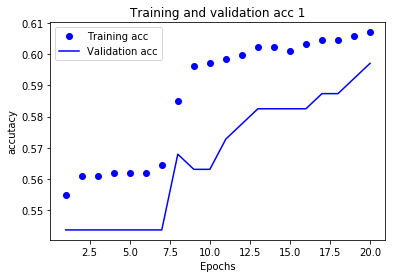

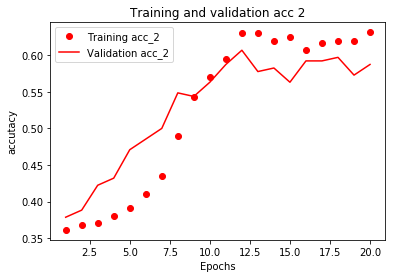

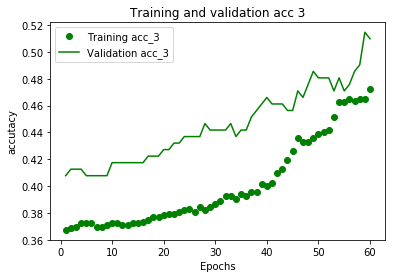

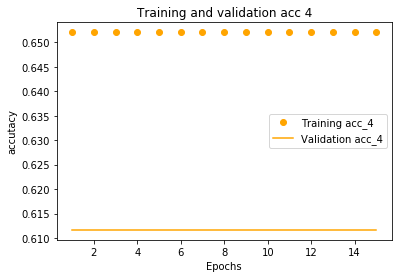

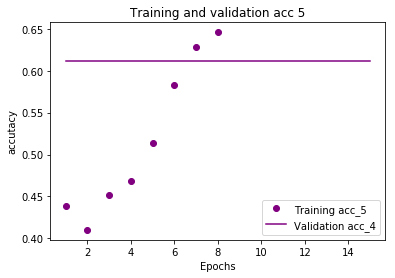

In [12]:
acc_values=hd_1['acc']
val_acc_values=hd_1['val_acc']
plt.subplot()
plt.plot(epochs,acc_values,'bo',label='Training acc')
plt.plot(epochs,val_acc_values,'b',label='Validation acc')
plt.title("Training and validation acc 1")
plt.xlabel('Epochs')
plt.ylabel('accutacy')
plt.legend(loc='best')
plt.show()

acc_values_2=hd_2['acc']
val_acc_values_2=hd_2['val_acc']
plt.subplot()
plt.plot(epochs_2,acc_values_2,'bo',label='Training acc_2',color = 'red')
plt.plot(epochs_2,val_acc_values_2,'b',label='Validation acc_2', color = 'red')
plt.title("Training and validation acc 2")
plt.xlabel('Epochs')
plt.ylabel('accutacy')
plt.legend(loc='best')
plt.show()


acc_values_3=hd_3['acc']
val_acc_values_3=hd_3['val_acc']
plt.subplot()
plt.plot(epochs_3,acc_values_3,'bo',label='Training acc_3',color = 'green')
plt.plot(epochs_3,val_acc_values_3,'b',label='Validation acc_3', color = 'green')
plt.title("Training and validation acc 3")
plt.xlabel('Epochs')
plt.ylabel('accutacy')
plt.legend(loc='best')
plt.show()


acc_values_4=hd_4['acc']
val_acc_values_4=hd_4['val_acc']
plt.subplot()
plt.plot(epochs_4,acc_values_4,'bo',label='Training acc_4',color = 'orange')
plt.plot(epochs_4,val_acc_values_4,'b',label='Validation acc_4', color = 'orange')
plt.title("Training and validation acc 4")
plt.xlabel('Epochs')
plt.ylabel('accutacy')
plt.legend(loc='best')
plt.show()


acc_values_5=hd_5['acc']
val_acc_values_5=hd_5['val_acc']
plt.plot(epochs_5,acc_values_5,'bo',label='Training acc_5',color = 'purple')
plt.plot(epochs_4,val_acc_values_4,'b',label='Validation acc_4', color = 'purple')
plt.title("Training and validation acc 5")
plt.xlabel('Epochs')
plt.ylabel('accutacy')
plt.legend(loc='best')
plt.show()


In [13]:
#model summaries
m1.summary()
m2.summary()
m3.summary()
m4.summary()
m5.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                144       
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 34        
Total params: 450
Trainable params: 450
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               4608      
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_6 (Den

In [14]:
print(hd_1['val_loss'][-1],
hd_2['val_loss'][-1],
hd_3['val_loss'][-1],
hd_4['val_loss'][-1],
hd_5['val_loss'][-1])

0.7044854933775745 0.6752620339393616 1.1908248239784565 0.678584112125693 0.6777114711918877


In [15]:
print(hd_1['val_acc'][-1],
hd_2['val_acc'][-1],
hd_3['val_acc'][-1],
hd_4['val_acc'][-1],
hd_5['val_acc'][-1])

0.5970873878997507 0.5873786640688053 0.5097087424935647 0.6116504808074062 0.6019417569764609


In [16]:
#*** 9   Rebuild the best model with all training data, test 

#Model # 2 had the best performance



m2h = \
    m2.fit(X_tr,y_tr, epochs = 20, batch_size = 100,\
                 validation_data = (X_val,y_val))
### Model 2
m_f = models.Sequential()
#input layer
m_f.add(layers.Dense(512,activation='relu',input_shape=(X_train.shape[1],)))
#hidden layer
m_f.add(layers.Dense(512,activation='relu'))
#hidden layer
m_f.add(layers.Dense(16,activation='tanh'))
#output layer
m_f.add(layers.Dense(2,activation='sigmoid'))
m_f.compile(optimizer=opt_rms_2,loss='binary_crossentropy',metrics=['acc'])


mfh = \
    m_f.fit(X_train,y_train_cat, epochs = 20, batch_size = 100,\
                 validation_data = (X_test,y_test_cat))


Train on 411 samples, validate on 103 samples
Epoch 1/20
411/411 [==============================] - 0s 140us/step - loss: 0.6267 - acc: 0.6484 - val_loss: 0.6709 - val_acc: 0.5777
Epoch 2/20
411/411 [==============================] - 0s 112us/step - loss: 0.6199 - acc: 0.6569 - val_loss: 0.6692 - val_acc: 0.6019
Epoch 3/20
411/411 [==============================] - 0s 104us/step - loss: 0.6129 - acc: 0.6606 - val_loss: 0.6682 - val_acc: 0.6019
Epoch 4/20
411/411 [==============================] - 0s 104us/step - loss: 0.6114 - acc: 0.6582 - val_loss: 0.6669 - val_acc: 0.5971
Epoch 5/20
411/411 [==============================] - 0s 129us/step - loss: 0.6096 - acc: 0.6655 - val_loss: 0.6660 - val_acc: 0.6019
Epoch 6/20
411/411 [==============================] - 0s 130us/step - loss: 0.6085 - acc: 0.6642 - val_loss: 0.6631 - val_acc: 0.5825
Epoch 7/20
411/411 [==============================] - 0s 130us/step - loss: 0.6075 - acc: 0.6618 - val_loss: 0.6633 - val_acc: 0.6019
Epoch 8/20
411/4

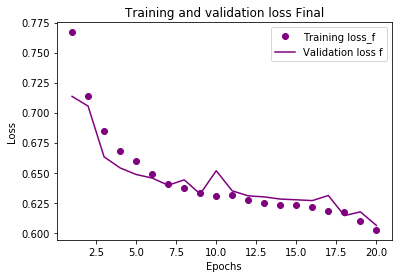

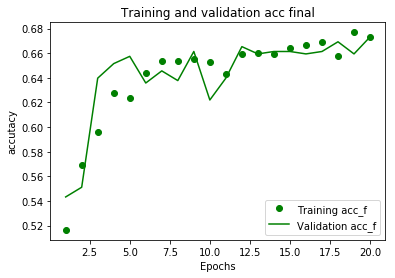

In [17]:
hd_f = mfh.history

loss_values_f=hd_f['loss']
val_loss_values_f=hd_f['val_loss']
epochs_f=range(1,len(loss_values_f)+1)
plt.plot(epochs_f,loss_values_f,'bo',label='Training loss_f',color = 'purple')
plt.plot(epochs_f,val_loss_values_f,'b',label='Validation loss f',color = 'purple')
plt.title("Training and validation loss Final")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc = 'best')
plt.show()

acc_values_f=hd_f['acc']
val_acc_values_f=hd_f['val_acc']
plt.subplot()
plt.plot(epochs_f,acc_values_f,'bo',label='Training acc_f',color = 'green')
plt.plot(epochs_f,val_acc_values_f,'b',label='Validation acc_f', color = 'green')
plt.title("Training and validation acc final")
plt.xlabel('Epochs')
plt.ylabel('accutacy')
plt.legend(loc='best')
plt.show()




